Introduccion al problema

In [ ]:
# %pip install gymnasium

### Windows:

method 1

In [ ]:
# %pip install swig

In [ ]:
# %pip install gymnasium[box2d]

method 2

In [ ]:
# %pip install swig

In [ ]:
# %pip install ufal.pybox2d

In [ ]:
# %pip install pygame

### Linux:

In [ ]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [3]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [4]:
import torch
import tensorflow as tf


In [5]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [6]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [7]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [8]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [9]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [10]:
print(lunar.env.action_space.sample())  # Take a random action

1


In [11]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[-2.336986    1.5044442  -6.883057   -0.1013969   0.3339268  -5.277737
  0.27915874  0.35174948]


Running a random episode.

In [12]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                input("Press Enter to continue...")

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    lunar.close()

In [13]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 0, New state: [ 0.01260042  1.3889632   0.6372539  -0.5007804  -0.01443607 -0.14286566
  0.          0.        ], Reward: -1.081067137916392, Done: False
Step taken: 3, New state: [ 0.01896009  1.377101    0.64470243 -0.527325   -0.0230625  -0.17254466
  0.          0.        ], Reward: -1.955430767772184, Done: False
Step taken: 0, New state: [ 0.02532015  1.3646394   0.6447289  -0.5540017  -0.03168709 -0.17250767
  0.          0.        ], Reward: -1.342805101463, Done: False
Step taken: 3, New state: [ 0.03174534  1.3515711   0.65288025 -0.5810589  -0.04194403 -0.20515819
  0.          0.        ], Reward: -2.1575191599651746, Done: False
Step taken: 0, New state: [ 0.03817091  1.3379043   0.6529113  -0.6077344  -0.05219861 -0.2051104
  0.          0.        ], Reward: -1.4739237837078747, Done: False
Step taken: 0, New state: [ 0.04459677  1.3236389   0.6529415  -0.6344102  -0.06245185 -0.20508346
  0.          0.        ], Reward: -1.4600681616627469, Done: False
Step 

DQN

In [14]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)

Train

In [15]:
agent = DQNAgent(lunar)
agent.train()

QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=4, bias=True)
)
Device: cuda
Entrenamiento optimizado para EFICIENCIA DE COMBUSTIBLE
Objetivo: Score > 200 con uso eficiente de motores
Ep    0 | Score promedio ult. 50 episodios:  -92.63 | Último:  -92.6 | Éxito:  0.0% | Eficiente:  0.0% | Loss promedio ult. 50 episodios:    5.11 | ε: 0.9980
Ep   50 | Score promedio ult. 50 episodios: -163.71 | Último: -182.4 | Éxito:  0.0% | Eficiente:  2.0% | Loss promedio ult. 50 episodios:   91.82 | ε: 0.9029
Ep  100 | Score promedio ult. 50 episodios: -127.68 | Último:  -69.7 | Éxito:  0.0% | Eficiente:  1.0% | Loss promedio ult. 50 episodios:   48.39 | ε: 0.8169
Ep  150 | Score promedio ult. 50 episodios:  -92.18 | Último:  -43.2 | Éxito:  0.0% | Eficiente:  0.0% | Loss promedio ult. 50 episodios:   46.53 

([np.float64(-92.62776305169196),
  np.float64(-291.81050307332373),
  np.float64(-187.55981696936323),
  np.float64(-154.86699306770277),
  np.float64(-112.34683835113901),
  np.float64(-53.95717854356664),
  np.float64(-128.08020458704533),
  np.float64(-327.58841316535506),
  np.float64(-208.57044717156393),
  np.float64(-94.63977587019076),
  np.float64(-147.60332806639067),
  np.float64(-135.95349939853693),
  np.float64(-381.1649392215878),
  np.float64(-284.82430652094286),
  np.float64(-75.32861193381623),
  np.float64(-277.8807763572536),
  np.float64(-130.38969751205596),
  np.float64(-88.68596237556413),
  np.float64(-3.7754453418154554),
  np.float64(-203.80778658995575),
  np.float64(-231.3136921076991),
  np.float64(-189.29295410941535),
  np.float64(-59.74209067019377),
  np.float64(-361.3574010976113),
  np.float64(-285.2283241010341),
  np.float64(-209.7819260579622),
  np.float64(18.77993913984639),
  np.float64(-253.2873533914796),
  np.float64(-100.82268799226311),


Test

In [6]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelo_DQN.h5")





QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=4, bias=True)
)
Device: cpu
Modelo cargado desde modelo_DQN.h5


In [7]:
test_lunar_lander(steps_to_run_before_pause=1500, agent=agent, episodes=1)

Episode finished, score: 299.8050833309242
Environment closed.


In [17]:
# En una nueva celda del Jupyter Notebook:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_results(timestamp):
    """
    Grafica los resultados del entrenamiento
    timestamp: timestamp del archivo (ej: "20231206_143022")
    """
    
    # Leer datos
    scores = []
    episodes = []
    
    # Leer scores individuales
    with open(f"training_scores_{timestamp}.txt", "r") as f:
        lines = f.readlines()[1:]  # Saltar header
        for line in lines:
            ep, score = line.strip().split(", ")
            episodes.append(int(ep))
            scores.append(float(score))
    
    # Leer promedios móviles
    avg_episodes = []
    avg_scores = []
    with open(f"training_avg_scores_{timestamp}.txt", "r") as f:
        lines = f.readlines()[1:]  # Saltar header
        for line in lines:
            ep, avg_score = line.strip().split(", ")
            avg_episodes.append(int(ep))
            avg_scores.append(float(avg_score))
    
    # Crear gráficas
    plt.figure(figsize=(15, 5))
    
    # Gráfica 1: Scores por episodio
    plt.subplot(1, 3, 1)
    plt.plot(episodes, scores, alpha=0.3, color='blue', label='Score individual')
    plt.plot(avg_episodes, avg_scores, color='red', linewidth=2, label='Promedio móvil (50 ep)')
    plt.axhline(y=200, color='green', linestyle='--', label='Objetivo (200)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xlabel('Episodio')
    plt.ylabel('Score')
    plt.title('Progreso del Entrenamiento')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Gráfica 2: Histograma de scores
    plt.subplot(1, 3, 2)
    plt.hist(scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(x=200, color='green', linestyle='--', label='Objetivo (200)')
    plt.axvline(x=np.mean(scores), color='red', linestyle='-', label=f'Promedio ({np.mean(scores):.1f})')
    plt.xlabel('Score')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Scores')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Gráfica 3: Últimos 100 episodios
    plt.subplot(1, 3, 3)
    last_100_episodes = episodes[-100:] if len(episodes) >= 100 else episodes
    last_100_scores = scores[-100:] if len(scores) >= 100 else scores
    plt.plot(last_100_episodes, last_100_scores, 'o-', color='purple', markersize=3)
    plt.axhline(y=200, color='green', linestyle='--', label='Objetivo (200)')
    plt.axhline(y=np.mean(last_100_scores), color='red', linestyle='-', 
                label=f'Promedio últimos 100: {np.mean(last_100_scores):.1f}')
    plt.xlabel('Episodio')
    plt.ylabel('Score')
    plt.title('Últimos 100 Episodios')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'training_progress_{timestamp}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Estadísticas
    successful = sum(1 for s in scores if s >= 200)
    print(f"\n📊 ESTADÍSTICAS:")
    print(f"Score promedio: {np.mean(scores):.2f}")
    print(f"Score máximo: {max(scores):.2f}")
    print(f"Aterrizajes exitosos: {successful}/{len(scores)} ({successful/len(scores)*100:.1f}%)")

# Usar así (reemplaza con tu timestamp):
# plot_training_results("20231206_143022")

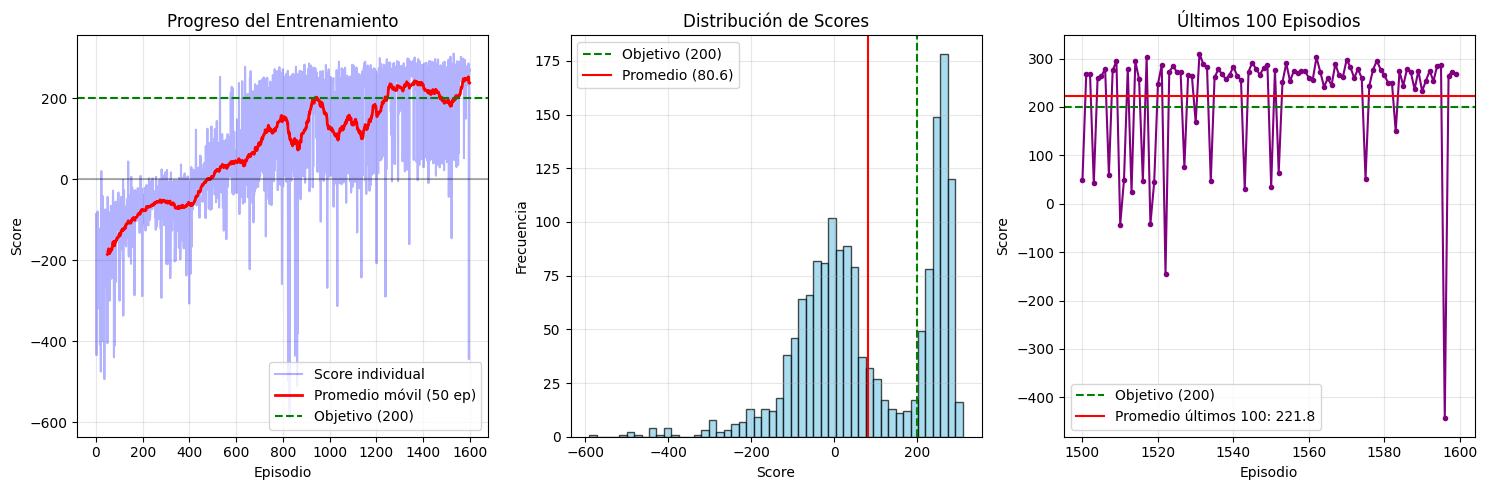


📊 ESTADÍSTICAS:
Score promedio: 80.64
Score máximo: 310.21
Aterrizajes exitosos: 592/1600 (37.0%)


: 

In [ ]:
plot_training_results("20250605_184252")

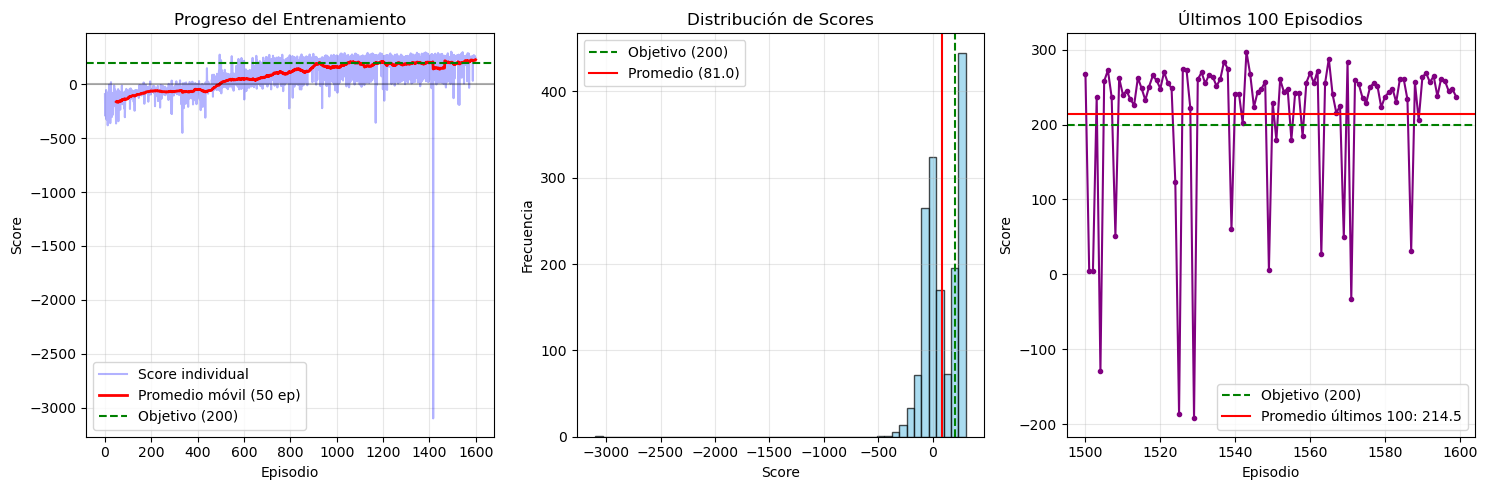


📊 ESTADÍSTICAS:
Score promedio: 81.02
Score máximo: 301.65
Aterrizajes exitosos: 586/1600 (36.6%)


In [18]:
plot_training_results("20250607_140012")

QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=4, bias=True)
)
Device: cpu


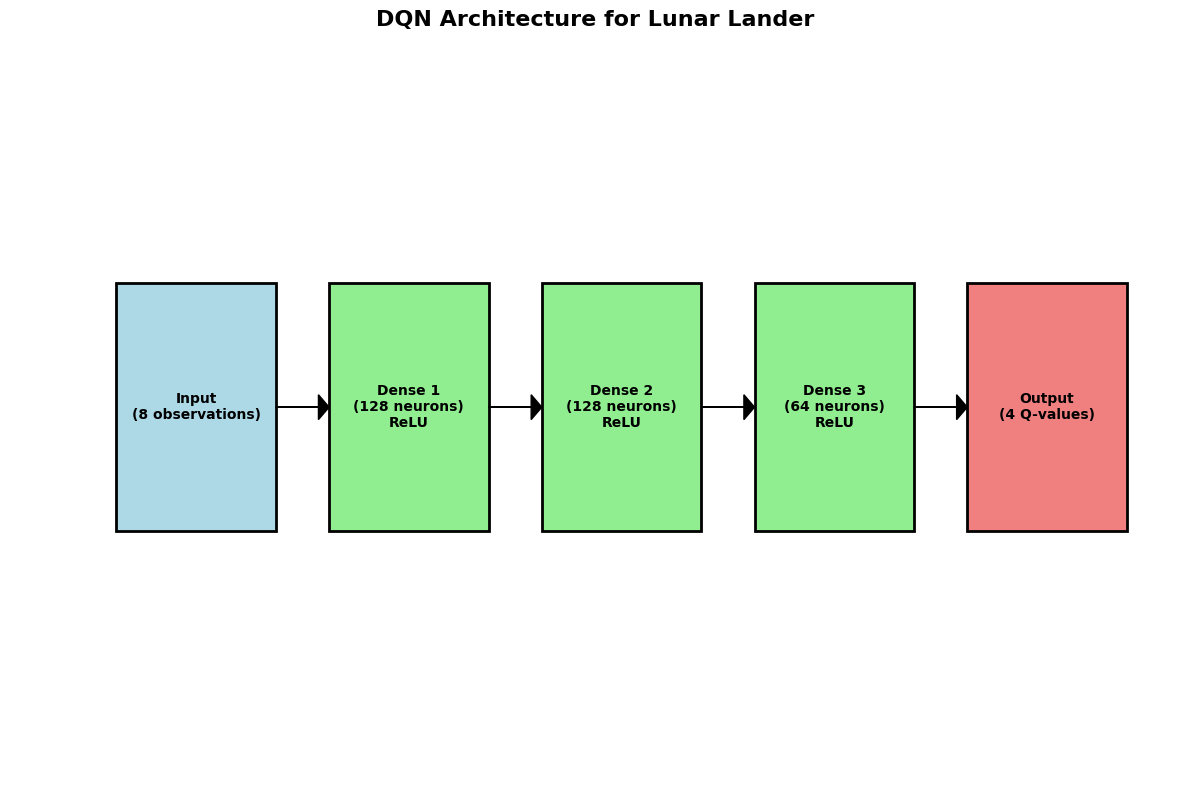

In [15]:
# Replace your current visualization code with:
# 1. Load your PyTorch model
from DQN import DQNAgent
agent = DQNAgent(lunar)

# 2. Create a simple architecture diagram instead
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Define layer positions and sizes
layers = [
    {"name": "Input\n(8 observations)", "pos": (1, 4), "size": (1.5, 1), "color": "lightblue"},
    {"name": "Dense 1\n(128 neurons)\nReLU", "pos": (3, 4), "size": (1.5, 1), "color": "lightgreen"},
    {"name": "Dense 2\n(128 neurons)\nReLU", "pos": (5, 4), "size": (1.5, 1), "color": "lightgreen"},
    {"name": "Dense 3\n(64 neurons)\nReLU", "pos": (7, 4), "size": (1.5, 1), "color": "lightgreen"},
    {"name": "Output\n(4 Q-values)", "pos": (9, 4), "size": (1.5, 1), "color": "lightcoral"}
]

# Draw layers
for layer in layers:
    rect = patches.Rectangle(layer["pos"], layer["size"][0], layer["size"][1], 
                           linewidth=2, edgecolor='black', facecolor=layer["color"])
    ax.add_patch(rect)
    ax.text(layer["pos"][0] + layer["size"][0]/2, layer["pos"][1] + layer["size"][1]/2, 
           layer["name"], ha='center', va='center', fontsize=10, fontweight='bold')

# Draw arrows
for i in range(len(layers)-1):
    start_x = layers[i]["pos"][0] + layers[i]["size"][0]
    end_x = layers[i+1]["pos"][0]
    y = layers[i]["pos"][1] + layers[i]["size"][1]/2
    ax.arrow(start_x, y, end_x - start_x - 0.1, 0, head_width=0.1, head_length=0.1, 
             fc='black', ec='black')

ax.set_xlim(0, 11)
ax.set_ylim(3, 6)
ax.set_title("DQN Architecture for Lunar Lander", fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.savefig('dqn_architecture.png', dpi=300, bbox_inches='tight')
plt.show()


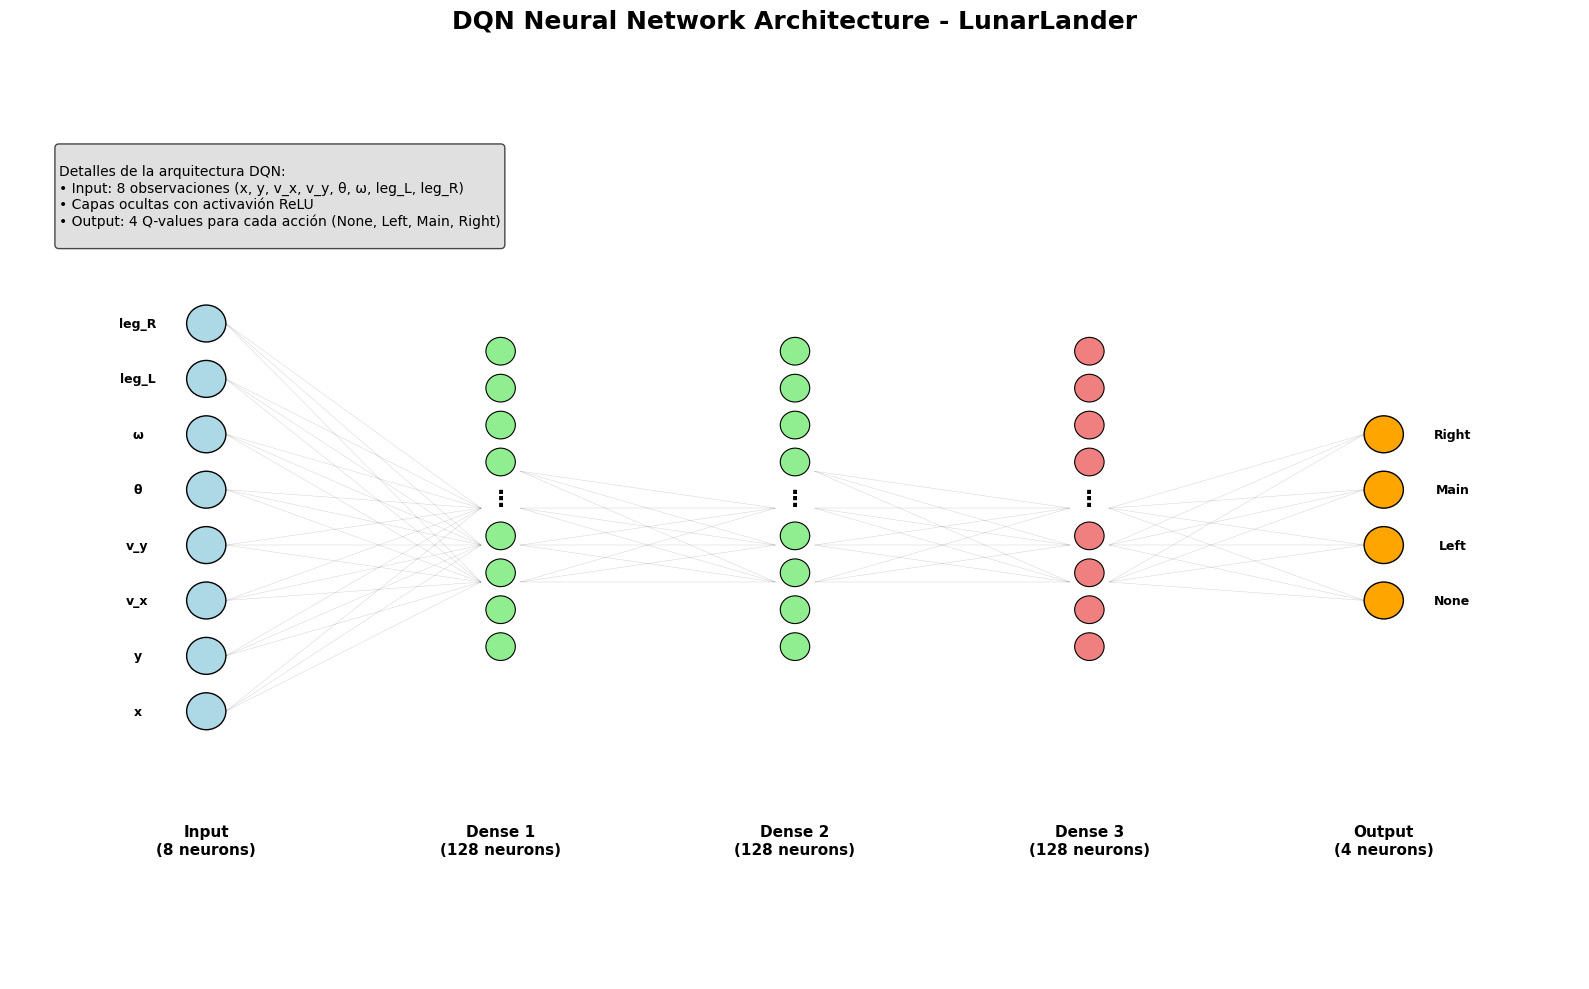

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Define layers with better positioning
layers = [
    {"name": "Input", "neurons": 8, "pos": (2, 5), "show_all": True, "color": "lightblue"},
    {"name": "Dense 1", "neurons": 128, "pos": (5, 5), "show_all": False, "color": "lightgreen"},
    {"name": "Dense 2", "neurons": 128, "pos": (8, 5), "show_all": False, "color": "lightgreen"},
    {"name": "Dense 3", "neurons": 64, "pos": (11, 5), "show_all": False, "color": "lightcoral"},
    {"name": "Output", "neurons": 4, "pos": (14, 5), "show_all": True, "color": "orange"}
]

def draw_layer_fixed(layer, ax):
    x, y = layer["pos"]
    neurons = layer["neurons"]
    show_all = layer["show_all"]
    color = layer["color"]
    name = layer["name"]
    
    if show_all:
        # Show all neurons for small layers (Input and Output)
        spacing = 0.6
        start_y = y - (neurons - 1) * spacing / 2
        
        for i in range(neurons):
            circle_y = start_y + i * spacing
            circle = patches.Circle((x, circle_y), 0.2, 
                                  facecolor=color, edgecolor='black', linewidth=1)
            ax.add_patch(circle)
            
        # Labels for each neuron in input/output
        if name == "Input":
            labels = ["x", "y", "v_x", "v_y", "θ", "ω", "leg_L", "leg_R"]
            for i, label in enumerate(labels):
                label_y = start_y + i * spacing
                ax.text(x - 0.7, label_y, label, ha='center', va='center', 
                       fontsize=9, fontweight='bold')
        elif name == "Output":
            labels = ["None", "Left", "Main", "Right"]
            for i, label in enumerate(labels):
                label_y = start_y + i * spacing
                ax.text(x + 0.7, label_y, label, ha='center', va='center', 
                       fontsize=9, fontweight='bold')
    else:
        # Show representative neurons for large layers
        # Create a column of neurons with appropriate spacing
        max_show = 12  # Maximum neurons to show
        spacing = 0.4
        
        if neurons <= max_show:
            # Show all if small enough
            start_y = y - (neurons - 1) * spacing / 2
            for i in range(neurons):
                circle_y = start_y + i * spacing
                circle = patches.Circle((x, circle_y), 0.15, 
                                      facecolor=color, edgecolor='black', linewidth=0.8)
                ax.add_patch(circle)
        else:
            # Show top 4, middle indicator, bottom 4
            show_neurons = 8
            start_y = y - (show_neurons - 1) * spacing / 2
            
            # Top neurons
            for i in range(4):
                circle_y = start_y + i * spacing
                circle = patches.Circle((x, circle_y), 0.15, 
                                      facecolor=color, edgecolor='black', linewidth=0.8)
                ax.add_patch(circle)
            
            # Middle dots indicator
            middle_y = start_y + 4 * spacing
            ax.text(x, middle_y, "⋮", ha='center', va='center', fontsize=16, fontweight='bold')
            
            # Bottom neurons
            for i in range(4, 8):
                circle_y = start_y + (i + 1) * spacing  # +1 to account for dots
                circle = patches.Circle((x, circle_y), 0.15, 
                                      facecolor=color, edgecolor='black', linewidth=0.8)
                ax.add_patch(circle)
    
    # Add layer label below
    ax.text(x, y - 3.5, f"{name}\n({neurons} neurons)", 
           ha='center', va='center', fontsize=11, fontweight='bold')

# Draw all layers
for layer in layers:
    draw_layer_fixed(layer, ax)

# Draw connections between layers
def draw_connections(layer1, layer2, ax):
    x1, y1 = layer1["pos"]
    x2, y2 = layer2["pos"]
    
    # Draw a few sample connections
    if layer1["show_all"] and layer2["show_all"]:
        # Both small layers - connect some neurons
        for i in range(min(3, layer1["neurons"])):
            for j in range(min(2, layer2["neurons"])):
                start_y = y1 - (layer1["neurons"] - 1) * 0.6 / 2 + i * 0.6
                end_y = y2 - (layer2["neurons"] - 1) * 0.6 / 2 + j * 0.6
                ax.plot([x1 + 0.2, x2 - 0.2], [start_y, end_y], 
                       'k-', alpha=0.3, linewidth=0.5)
    elif layer1["show_all"] and not layer2["show_all"]:
        # Small to large layer
        for i in range(layer1["neurons"]):
            start_y = y1 - (layer1["neurons"] - 1) * 0.6 / 2 + i * 0.6
            for j in range(3):  # Connect to first 3 visible neurons
                end_y = y2 - 3.5 * 0.4 / 2 + j * 0.4
                ax.plot([x1 + 0.2, x2 - 0.2], [start_y, end_y], 
                       'k-', alpha=0.2, linewidth=0.3)
    elif not layer1["show_all"] and layer2["show_all"]:
        # Large to small layer
        for i in range(3):  # From first 3 visible neurons
            start_y = y1 - 3.5 * 0.4 / 2 + i * 0.4
            for j in range(layer2["neurons"]):
                end_y = y2 - (layer2["neurons"] - 1) * 0.6 / 2 + j * 0.6
                ax.plot([x1 + 0.2, x2 - 0.2], [start_y, end_y], 
                       'k-', alpha=0.2, linewidth=0.3)
    else:
        # Large to large layer
        for i in range(4):  # From first 4 visible neurons
            start_y = y1 - 3.5 * 0.4 / 2 + i * 0.4
            for j in range(3):  # To first 3 visible neurons
                end_y = y2 - 3.5 * 0.4 / 2 + j * 0.4
                ax.plot([x1 + 0.2, x2 - 0.2], [start_y, end_y], 
                       'k-', alpha=0.2, linewidth=0.3)

# Draw connections between adjacent layers
for i in range(len(layers) - 1):
    draw_connections(layers[i], layers[i + 1], ax)

# Add title and formatting
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.set_title("DQN Neural Network Architecture - LunarLander", fontsize=18, fontweight='bold', pad=20)
ax.axis('off')

# Add additional info
info_text = """
Detalles de la arquitectura DQN:
• Input: 8 observaciones (x, y, v_x, v_y, θ, ω, leg_L, leg_R)
• Capas ocultas con activavión ReLU
• Output: 4 Q-values para cada acción (None, Left, Main, Right)
"""
ax.text(0.5, 9, info_text, fontsize=10, verticalalignment='top', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.savefig('dqn_architecture_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

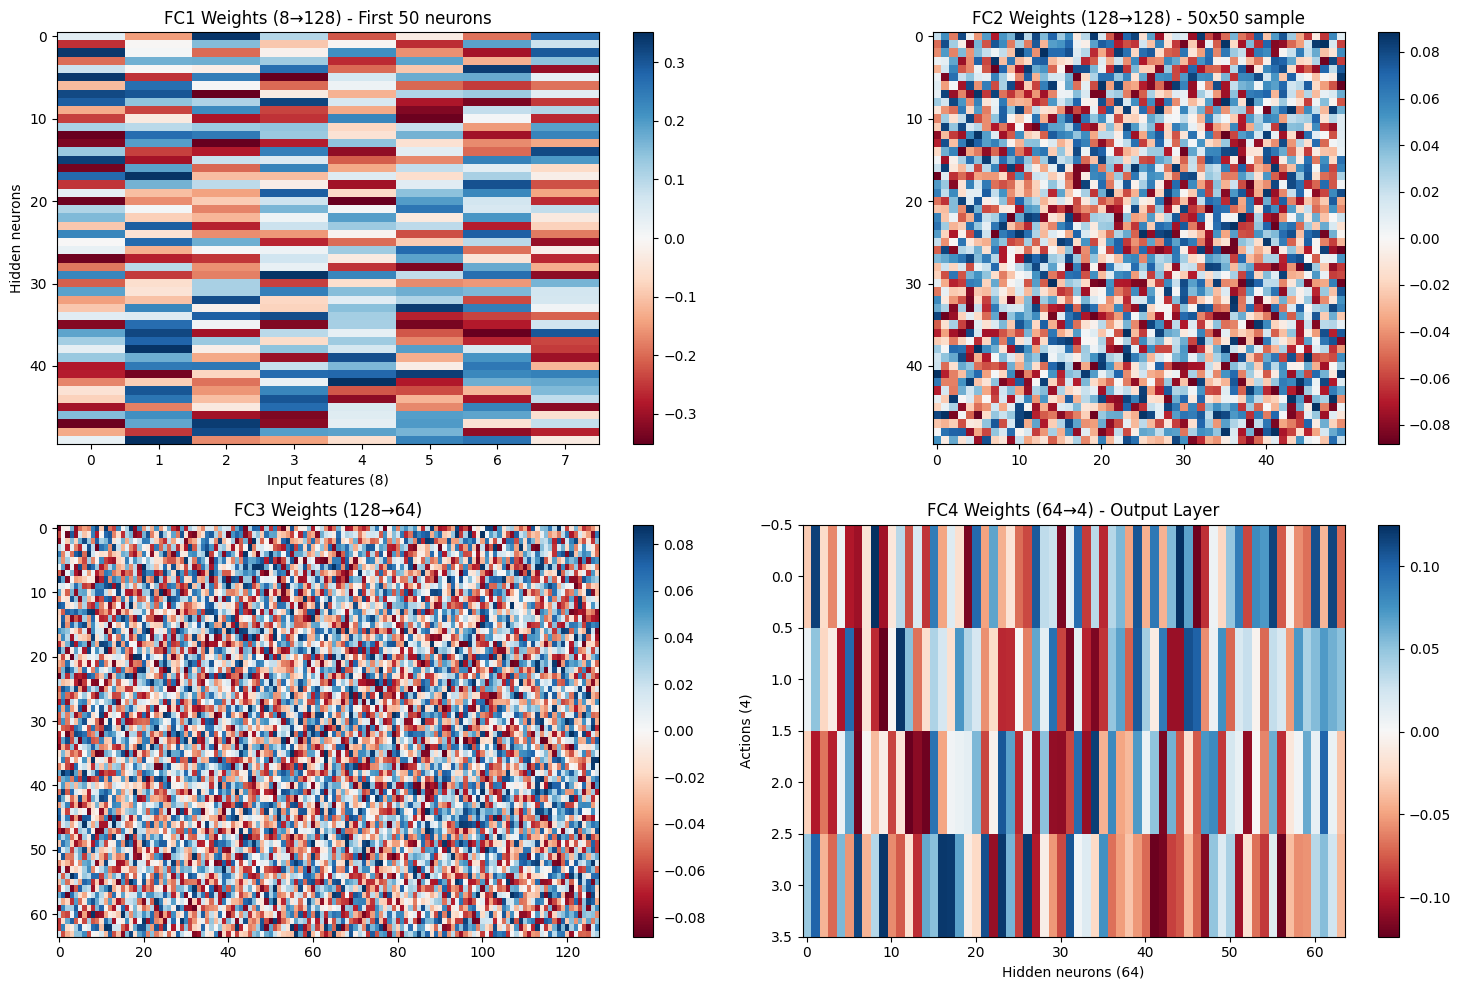

In [13]:
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")

CUDA available: True
Device: cuda


REINFORCE

In [ ]:
from REINFORCE import REINFORCEAgent
lunar = LunarLanderEnv(render_mode=None)

In [ ]:
# agent = REINFORCEAgent(lunar, episodes=5000)
# agent.load_model("modelo_REINFORCE.h5")

In [ ]:
agent = REINFORCEAgent(lunar)
agent.load_model("modelo_REINFORCE.h5")

In [ ]:
test_lunar_lander(steps_to_run_before_pause=75, agent=agent, episodes=1)